# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [7]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):   
	x_n = x0 # initial guess for root
    
	for n in range(maxiter):
        
		f_val = f(x_n)
		f_der_val = fder(x_n)

		if abs(f_val) < eps:
			return x_n,n

		if abs(f_der_val) < 1e-14:
			raise ValueError("The derivative was close to zero")
            
         #calculate next iterate using Newton´s formula   
            
         #x[n+1] = xn - [f(xn)/f'(xn)]
         
		delta_xn = -f_val / f_der_val
        
		x_new= x_n + delta_xn
		
		if abs(delta_xn)<eps*abs(x_new): # check for convergence
			return x_new,n+1
        
		x_n = x_new
     
	raise ValueError("Maximum number of iterations exceeded")

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [10]:
import math

def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

# Test newton_iteration with f(x) = x^2 - 1
x0 = 3.0 # initial guess for root
eps = 1e-6 # target accuracy

x,n_iter = newton_iteration(f, fder, x0, eps=eps)

print("Test passed: found a root of function {} after {} iterations".format(f.__name__, n_iter))

Test passed: found a root of function f after 5 iterations


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [11]:
def modified_newton_iteration(f, fder, x0, m=1.0, eps=1e-5):
	x_n = x0 # initial guess
    
	for n in range(100): # limit on number of iterations
        
         #calculate next iterate using Modified Newton´s formula   
            
         #xn+1=xn−m*f(xn)/f'(xn)
         
		f_val = f(x_n)
        
		if abs(f_val) < eps:
			return x_n,n

# 		if abs(fder(x_n)) < 1e-14:
# 			raise ValueError("The derivative was close to zero")
            
		delta_xn = -m*f_val / fder(x_n)
        
		x_new= x_n + delta_xn
		
		if abs(delta_xn)<eps*abs(x_new): # check for convergence
			return x_new,n+1
        
		x_n = x_new
     
	raise ValueError("Maximum number of iterations exceeded")

# Part II. Fixed-point iteration

*Consider* the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [19]:
import numpy as np
def fixed_point_iteration_alpha(f, alpha, x_init, eps=1e-8, maxiter=100):
    
	x = x_init
	n_iter = 0
    
	for n in range(maxiter):
        
		x_new = x - alpha*f(x)
		
		if abs(x-x_new) < eps*abs(x): # check for convergence 
			return x_new, n_iter+1
        
		x = x_new # update estimate 

	raise ValueError("The method failed to converge within {} iterations".format(maxiter))
 

def fprime(x):
    return -np.sin(x)/(2*np.sqrt(x))


a_min = 2 / (np.abs(fprime(0.6)) + np.abs(fprime(np.pi/4)))
a_max = 2 / (np.abs(fprime(np.pi/2)) + np.abs(fprime(np.pi/4)))

print("Optimal value of alpha: {:.6f}".format(1/a_max))



Optimal value of alpha: 0.398942


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

##Intento I

<ipython-input-27-329ea37c8c8a>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('brg', 3)


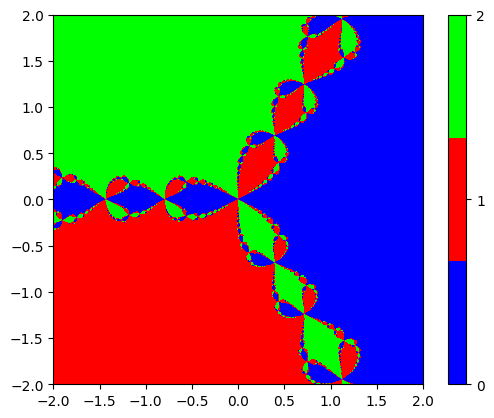

In [27]:
import numpy as np

def newton(x0, nmax=100, tol=1e-6):
    # Newton-Raphson iteration for x^3=1
    for i in range(nmax):
        x = 1/3 * (2*x0 + 1/x0**2)
        if abs(x - x0) < tol:
            break
        x0 = x
    # Determine which root it converged to
    roots = [np.exp(2j*np.pi*k/3) for k in range(3)]
    dists = [abs(x - root) for root in roots]
    root_idx = np.argmin(dists)
    return root_idx
    
import matplotlib.pyplot as plt

# Generate a grid of points in the complex plane
xgrid = np.linspace(-2, 2, 1000)
ygrid = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(xgrid, ygrid)
Z = X + 1j*Y

# Evaluate the Newton-Raphson iteration on the grid
img = np.zeros(Z.shape, dtype=int)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        img[i,j] = newton(Z[i,j])

# Plot the basins of attraction
colormap = plt.cm.get_cmap('brg', 3)
plt.imshow(img, extent=[-2, 2, -2, 2], cmap=colormap)
plt.colorbar(ticks=[0,1,2])


##Intento II 
tiene error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define complex roots of x^3=1
x0 = np.exp(2j*np.pi/3)
x1 = np.exp(2j*2*np.pi/3)

def newton_fractal(f, dfdx, roots, xmin=-1,xmax=1,ymin=-1,ymax=1,resolution=(1000j)):
    xs,ys=np.mgrid[xmin:xmax:resolution,ymin:ymax:resolution]
    zs=xs+ys*1j
    
    for i in range(30):
        znext = zs - f(zs)/dfdx(zs)
        mask = abs(f(znext)) < abs(f(zs))
        zs[mask] = znext[mask]

    dist_x0,z_idx_x0=np.round(abs(zs-x0),15).min(axis=0),np.round(abs(zs-x0),15).argmin(axis=0)
    dist_x1,z_idx_x1=np.round(abs(zs-x1),15).min(axis=0),np.round(abs(zs-x1),15).argmin(axis=0)

    colors=np.zeros(xs.shape,dtype=int)

    colors[np.where(dist_x0<dist_x1)]+=5

    return xs,np.where(colors==10,roots[2],np.where(colors==5 | (colors==6 & (dist_x0<dist_x1)),roots[1],roots[0]))

def f(x):
     return x**3 - 1

def dfdx(x):
     return 3*x**2

xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5j, 1.5j
roots = [np.exp(2j*np.pi*k/3) for k in range(3)]

xs,color=newton_fractal(f,dfdx,np.array(roots),xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
plt.imshow(color.T,cmap='brg',origin='lower',extent=[xmin.real,xmax.real,ymin.imag,ymax.imag])
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.show()